In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score as sil

In [33]:
data = pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [34]:
data.rename({"Unnamed: 0": "States"}, axis=1, inplace=True)
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [36]:
df = data.set_index("States")
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [37]:
mmscaler = MinMaxScaler().fit_transform(df)

In [38]:
sdscaler = StandardScaler().fit_transform(df)

# Hierarchical

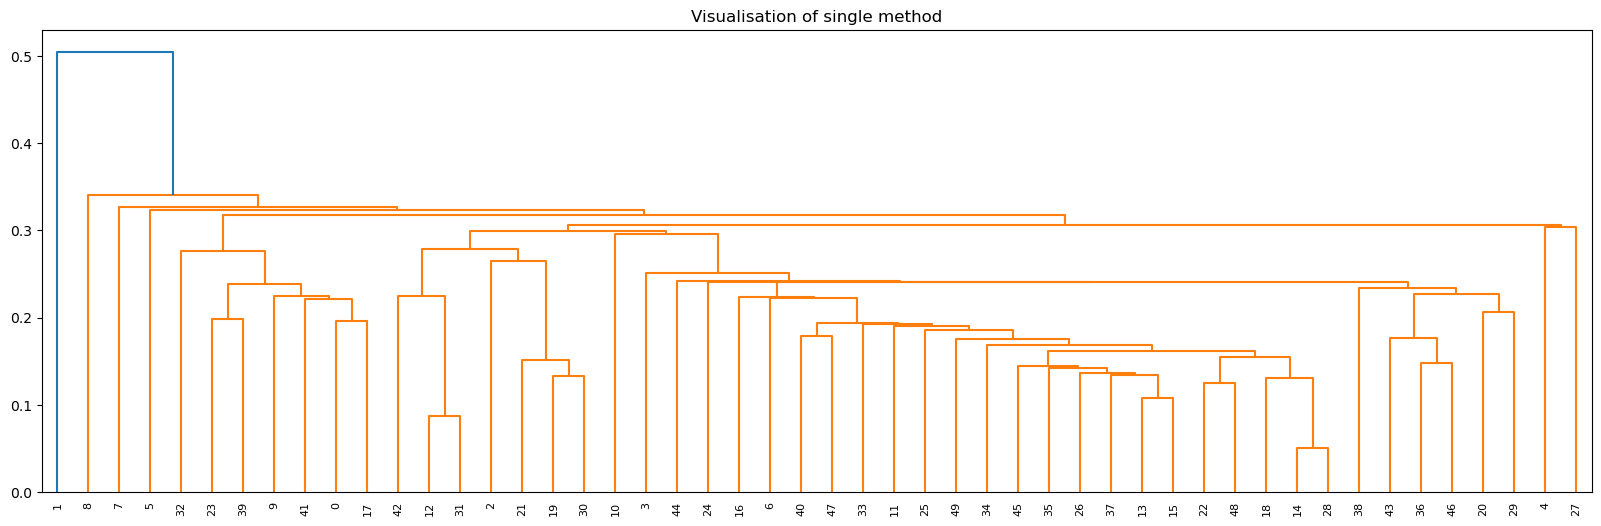

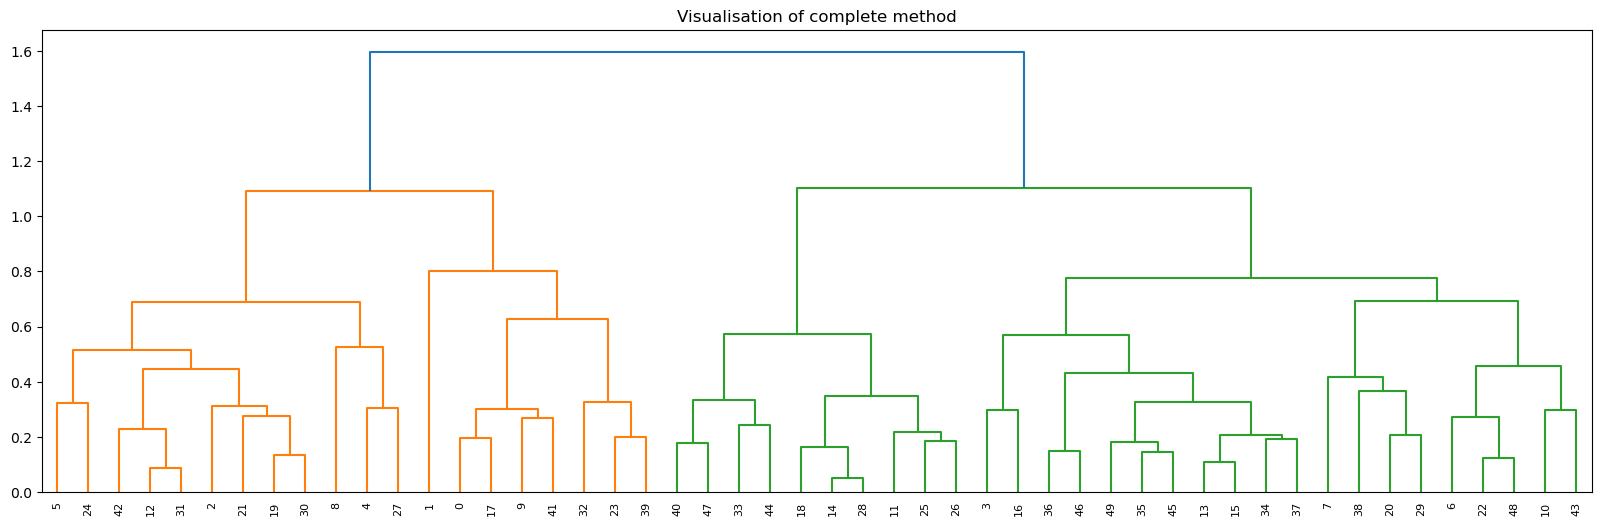

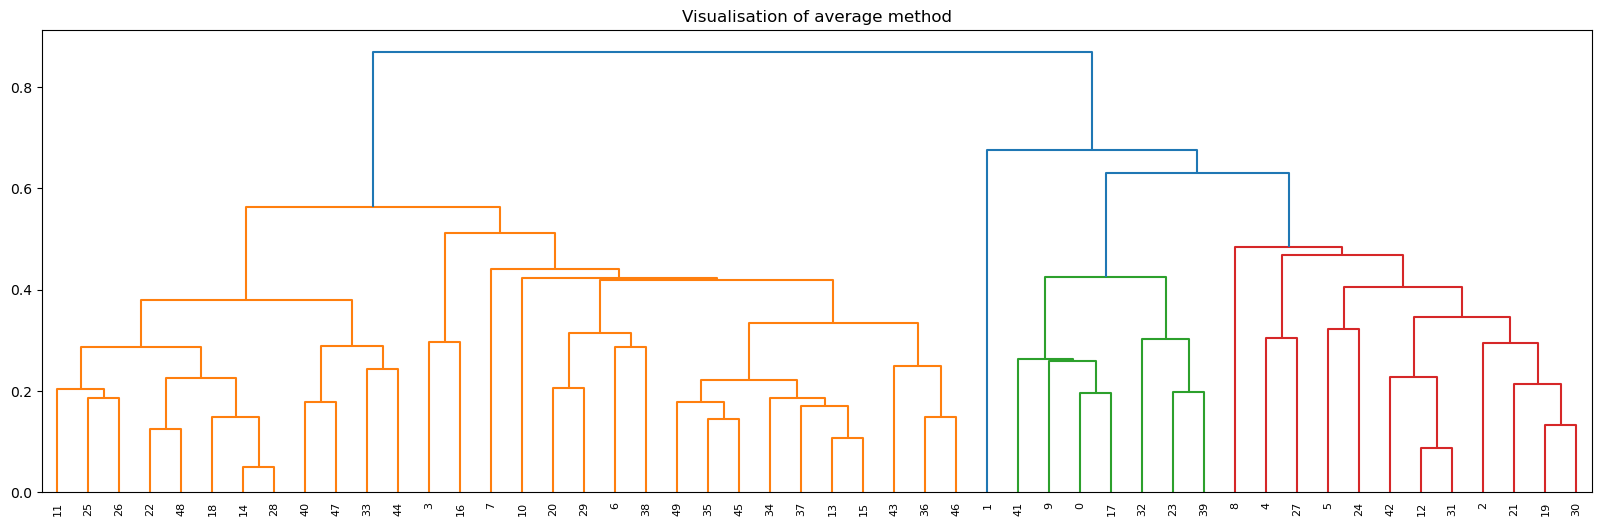

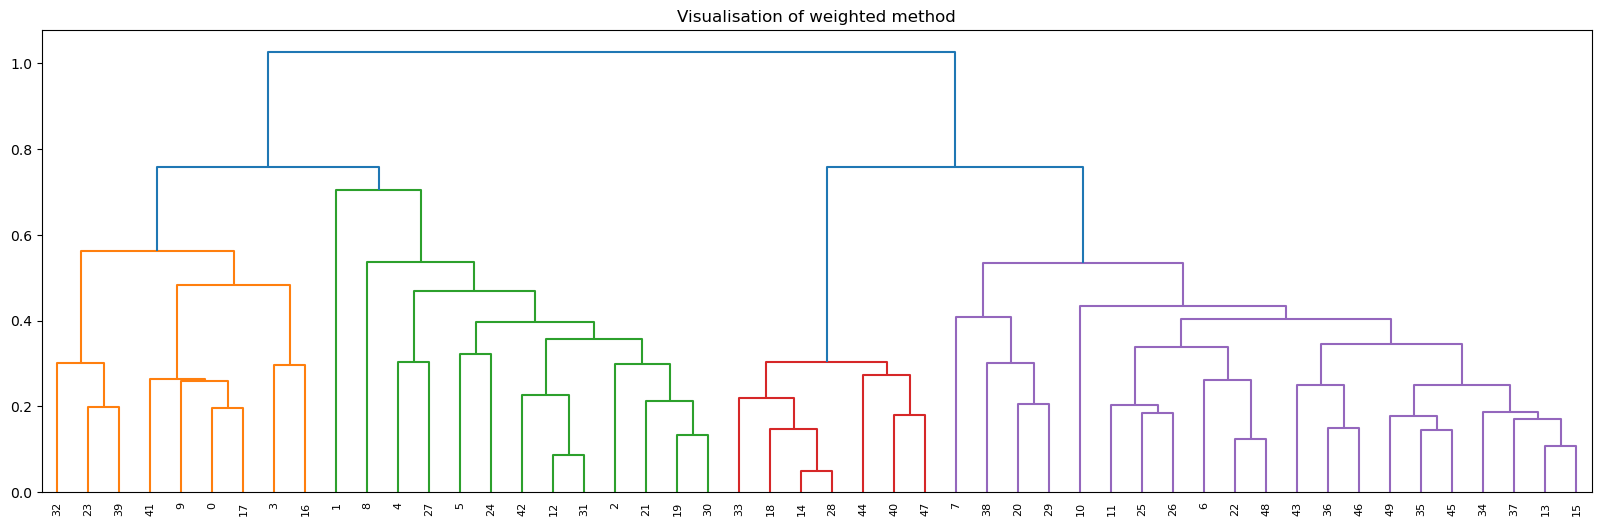

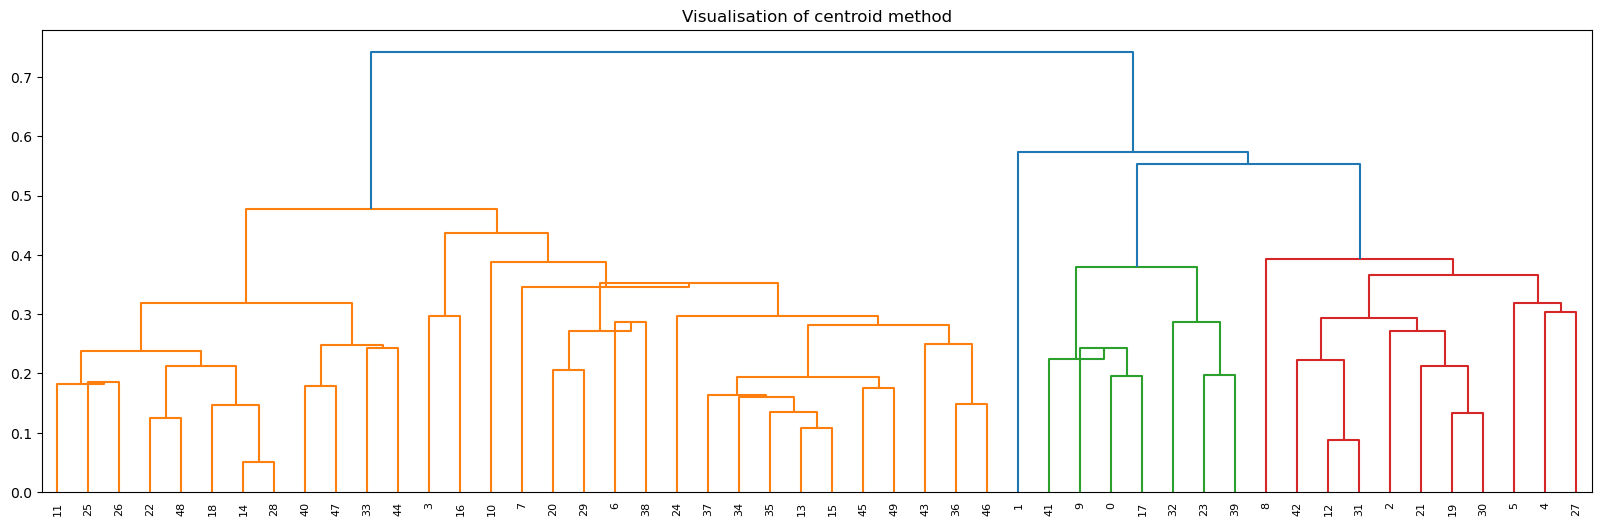

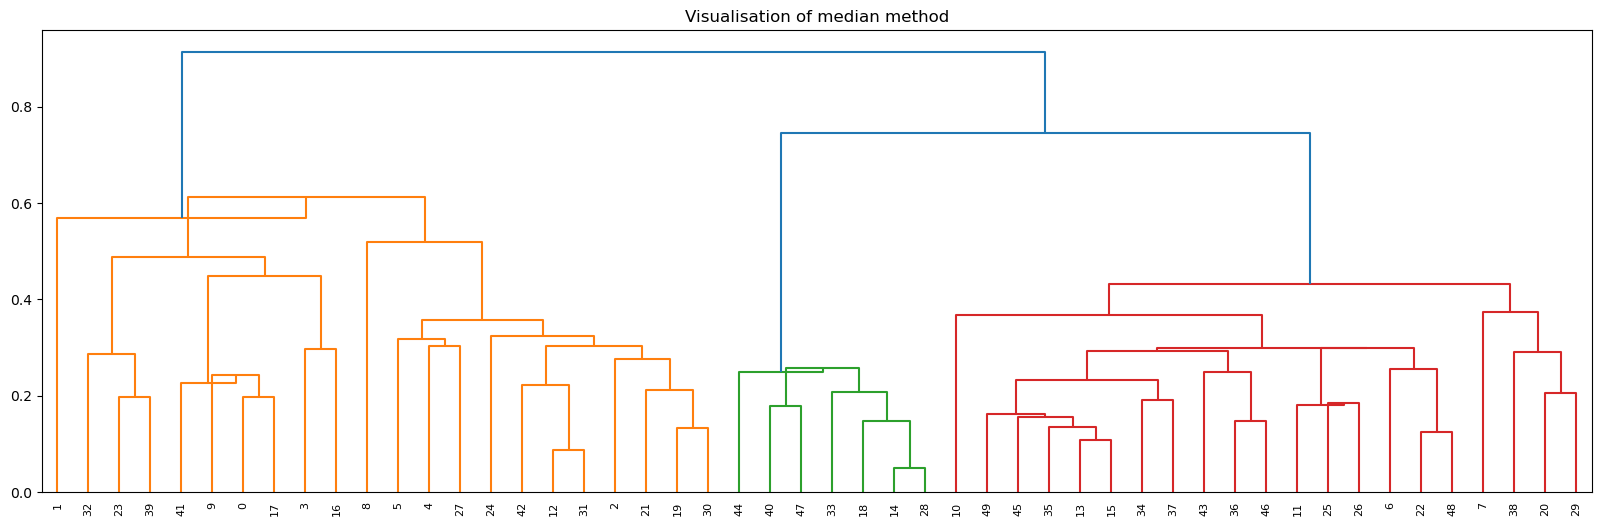

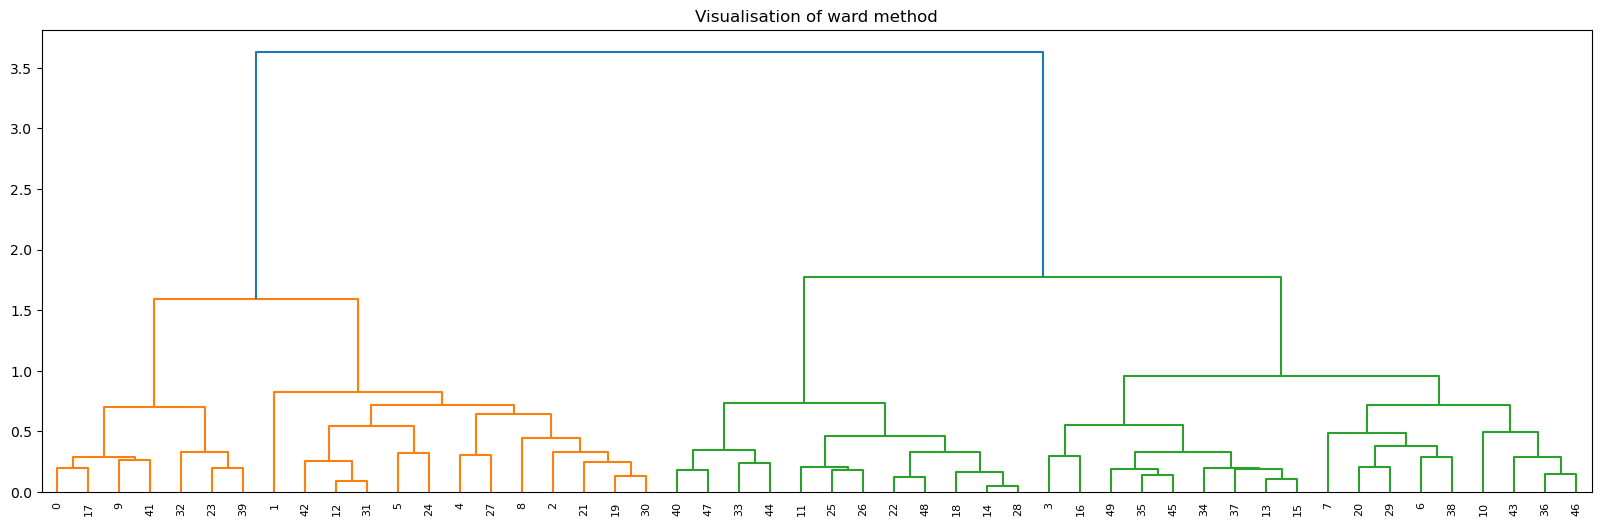

In [39]:
for method in ["single","complete", "average", "weighted", "centroid", "median", "ward"]:
    plt.figure(figsize=(20, 6))
    plt.title(f"Visualisation of {method} method")
    dendrogram = sch.dendrogram(sch.linkage(mmscaler, method=method, optimal_ordering=False))

In [40]:
#MinMaxScaler
for m in range(2, 10):
    for n in  ["ward", "complete", "average", "single"]:
        hc = AgglomerativeClustering(n_clusters=m, linkage=n)
        label1 = hc.fit_predict(mmscaler)
        sill = sil(mmscaler, label1)
        print(f"for {m} clusters with {n} linkages the score is {sill}")
    print("")

for 2 clusters with ward linkages the score is 0.42364457559625074
for 2 clusters with complete linkages the score is 0.42364457559625074
for 2 clusters with average linkages the score is 0.42364457559625074
for 2 clusters with single linkages the score is 0.21033337025958487

for 3 clusters with ward linkages the score is 0.31916915428121284
for 3 clusters with complete linkages the score is 0.30877213909512063
for 3 clusters with average linkages the score is 0.35149572430421583
for 3 clusters with single linkages the score is 0.14223288708185444

for 4 clusters with ward linkages the score is 0.3298707379986785
for 4 clusters with complete linkages the score is 0.3060729442426308
for 4 clusters with average linkages the score is 0.36992391140277175
for 4 clusters with single linkages the score is -0.1674119195474404

for 5 clusters with ward linkages the score is 0.28290124293256447
for 5 clusters with complete linkages the score is 0.3056360903608855
for 5 clusters with average lin

In [41]:
#Standard Scaler
for m in range(2, 10):
    for n in  ["ward", "complete", "average", "single"]:
        hc = AgglomerativeClustering(n_clusters=m, linkage=n)
        label1 = hc.fit_predict(sdscaler)
        sill = sil(sdscaler, label1)
        print(f"for {m} clusters with {n} linkages the score is {sill}")
    print("")

for 2 clusters with ward linkages the score is 0.4047944502519567
for 2 clusters with complete linkages the score is 0.4047944502519567
for 2 clusters with average linkages the score is 0.4084890326217641
for 2 clusters with single linkages the score is 0.23455598753159795

for 3 clusters with ward linkages the score is 0.31036358174027895
for 3 clusters with complete linkages the score is 0.36924314190439733
for 3 clusters with average linkages the score is 0.34863679190476177
for 3 clusters with single linkages the score is 0.14582343625170263

for 4 clusters with ward linkages the score is 0.3370187183556962
for 4 clusters with complete linkages the score is 0.31595507426164543
for 4 clusters with average linkages the score is 0.3636819420151221
for 4 clusters with single linkages the score is 0.174058063042673

for 5 clusters with ward linkages the score is 0.2731109448720741
for 5 clusters with complete linkages the score is 0.3174348822319004
for 5 clusters with average linkages 

In [48]:
#MinMaxScaler
agg = AgglomerativeClustering(n_clusters=2, linkage="ward")
pred = agg.fit_predict(mmscaler)

In [49]:
df["Labels"] = agg.labels_

In [50]:
df

,Murder,Assault,UrbanPop,Rape,Labels
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1


# KMeans

In [53]:
error = []
for n in range(1, 15):
    clust = KMeans(n, n_init=10)
    clust.fit(sdscaler)
    labels = clust.labels_
    centroids = clust.cluster_centers_
    error.append(clust.inertia_)
clust_df = pd.DataFrame({"No_Clusters": range(1, 15), "Cluster_Error": error})
clust_df

C:\Users\marang\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,No_Clusters,Cluster_Error
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.672852
4,5,50.295010
5,6,44.478982
6,7,39.361996
7,8,35.932422
8,9,30.641136
9,10,28.964910


C:\Users\marang\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


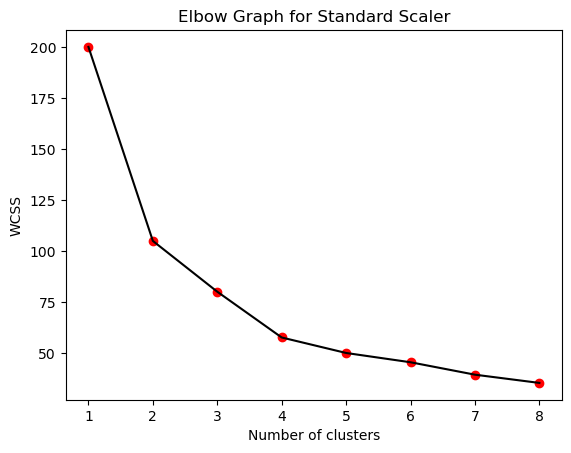

In [56]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(sdscaler)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9), wcss, color="black")
plt.scatter(range(1,9), wcss, color="red")
plt.title("Elbow Graph for Standard Scaler")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [58]:
#Silhoutte score for standard scaler
for n in range(2, 11):
    clust1 = KMeans(n_clusters=n)
    lab1 = clust1.fit_predict(sdscaler)
    sill = sil(sdscaler, lab1)
    print(f"for {n} clusters with the average silhoutte score is {sill}")

for 2 clusters with the average silhoutte score is 0.4084890326217641
for 3 clusters with the average silhoutte score is 0.30813622648945616
for 4 clusters with the average silhoutte score is 0.33968891433344395
for 5 clusters with the average silhoutte score is 0.3133544326927289
for 6 clusters with the average silhoutte score is 0.30428383175956125
for 7 clusters with the average silhoutte score is 0.2621958078441287
for 8 clusters with the average silhoutte score is 0.2562282575780333
for 9 clusters with the average silhoutte score is 0.2563480594529065
for 10 clusters with the average silhoutte score is 0.26961006440790997


In [59]:
kmodel = KMeans(n_clusters=2)
pred = kmodel.fit_predict(sdscaler)

In [60]:
df1 = data.set_index("States")
df1["Label"] = kmodel.labels_

In [61]:
df1

,Murder,Assault,UrbanPop,Rape,Label
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,0


C:\Users\marang\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


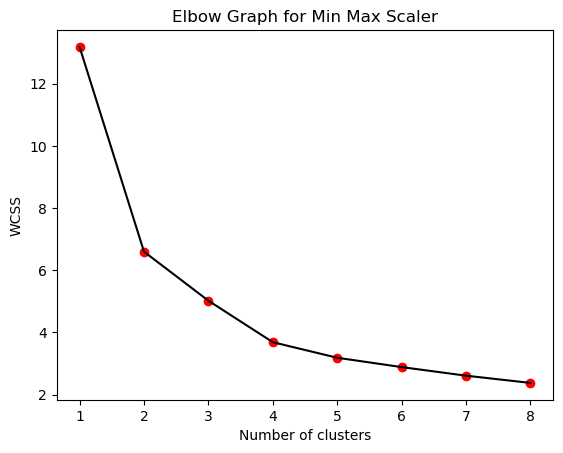

In [63]:
# Silhouette score for minmaxscore
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mmscaler)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9), wcss, color="black")
plt.scatter(range(1,9), wcss, color="red")
plt.title("Elbow Graph for Min Max Scaler")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [64]:
#Silhoutte score for standard scaler
for n in range(2, 11):
    clust1 = KMeans(n_clusters=n)
    lab1 = clust1.fit_predict(mmscaler)
    sill = sil(mmscaler, lab1)
    print(f"for {n} clusters with the average silhoutte score is {sill}")

for 2 clusters with the average silhoutte score is 0.42364457559625074
for 3 clusters with the average silhoutte score is 0.32393600472652184
for 4 clusters with the average silhoutte score is 0.34089035600743633
for 5 clusters with the average silhoutte score is 0.304591667724218
for 6 clusters with the average silhoutte score is 0.26239486582681676
for 7 clusters with the average silhoutte score is 0.25774140076644253
for 8 clusters with the average silhoutte score is 0.2655648494717597
for 9 clusters with the average silhoutte score is 0.24264089298807207
for 10 clusters with the average silhoutte score is 0.25403786932283806


In [69]:
kmodel1 = KMeans(n_clusters=2)
pred1 = kmodel1.fit_predict(mmscaler)

In [70]:
df2 = data.set_index("States")
df2["Label"] = kmodel1.labels_

In [71]:
df2

,Murder,Assault,UrbanPop,Rape,Label
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1


# DBSCAN

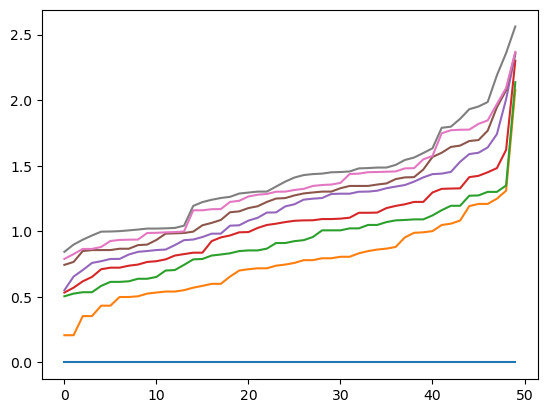

In [73]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(sdscaler)
distances, indices = nbrs.kneighbors(sdscaler)
distances = np.sort(distances, axis = 0)
plt.plot(distances)

In [88]:
for i in np.arange(0.25, 2.5, 0.25):
    for j in range(1, 10):
        db = DBSCAN(min_samples=j, eps=i).fit(sdscaler)
        labels= db.labels_
        if len(list(set(labels))) > 1:
            sill = sil(sdscaler, labels)
            print(f"For {i} eps with sample {j}, the score is {sill}")
    print("")

For 0.25 eps with sample 1, the score is 0.02524285085226844
For 0.25 eps with sample 2, the score is 0.038817626029398714

For 0.5 eps with sample 1, the score is 0.06502546728043575
For 0.5 eps with sample 2, the score is -0.2689925316677858

For 0.75 eps with sample 1, the score is -0.015304812731762202
For 0.75 eps with sample 2, the score is -0.09728961540145159
For 0.75 eps with sample 3, the score is -0.0957904679707531
For 0.75 eps with sample 4, the score is 0.03390633641714521
For 0.75 eps with sample 5, the score is -0.09530675795950011
For 0.75 eps with sample 6, the score is -0.15123089417719998

For 1.0 eps with sample 1, the score is 0.0011630308334708251
For 1.0 eps with sample 2, the score is 0.19290975823254836
For 1.0 eps with sample 3, the score is 0.19290975823254836
For 1.0 eps with sample 4, the score is 0.2051154919322
For 1.0 eps with sample 5, the score is 0.19486631995858555
For 1.0 eps with sample 6, the score is 0.2552597448455229
For 1.0 eps with sample 7,

In [93]:
#eps = 1.25 & sample 8 
dbscan1 = DBSCAN(eps=1.25, min_samples=8)
dbscan1.fit(sdscaler)

DBSCAN(eps=1.25, min_samples=8)

In [94]:
df3 = data.set_index("States")
df3["Labels"] = dbscan1.labels_
df3

,Murder,Assault,UrbanPop,Rape,Labels
States,,,,,
Alabama,13.2,236,58,21.2,-1
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,-1


In [97]:
#MinMaxScaler
for i in np.arange(0.25, 2.5, 0.25):
    for j in range(1, 10):
        db = DBSCAN(min_samples=j, eps=i).fit(mmscaler)
        labels = db.labels_
        if len(list(set(labels))) > 1:
            sill = sil(mmscaler, labels)
            print(f"For {i} eps with {j} samples, the score is {sill}")
    print("")

For 0.25 eps with 1 samples, the score is 0.017267396341248128
For 0.25 eps with 2 samples, the score is 0.20624439694672392
For 0.25 eps with 3 samples, the score is 0.20624439694672392
For 0.25 eps with 4 samples, the score is 0.11957404878685067
For 0.25 eps with 5 samples, the score is 0.18944737659567504
For 0.25 eps with 6 samples, the score is 0.26655403862449967
For 0.25 eps with 7 samples, the score is 0.11350307666011547
For 0.25 eps with 8 samples, the score is 0.024584741295684144
For 0.25 eps with 9 samples, the score is -0.06566023032995781

For 0.5 eps with 1 samples, the score is 0.21033337025958487
For 0.5 eps with 2 samples, the score is 0.21033337025958487
For 0.5 eps with 3 samples, the score is 0.21033337025958487
For 0.5 eps with 4 samples, the score is 0.21033337025958487
For 0.5 eps with 5 samples, the score is 0.21033337025958487
For 0.5 eps with 6 samples, the score is 0.21033337025958487
For 0.5 eps with 7 samples, the score is 0.21033337025958487
For 0.5 eps

In [98]:
#eps 0.5 and sample 1
dbscan1 = DBSCAN(eps=0.5, min_samples=1)
dbscan1.fit(mmscaler)

DBSCAN(min_samples=1)

In [99]:
df4 = data.set_index("States")
df4["Labels"] = dbscan1.labels_
df4

,Murder,Assault,UrbanPop,Rape,Labels
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
